In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from collections import Counter

In [85]:
ls data/

FEDFUNDS.csv  GDP.csv       ^GSPC.csv


In [105]:
pd.to_datetime('2007-02-20')

Timestamp('2007-02-20 00:00:00')

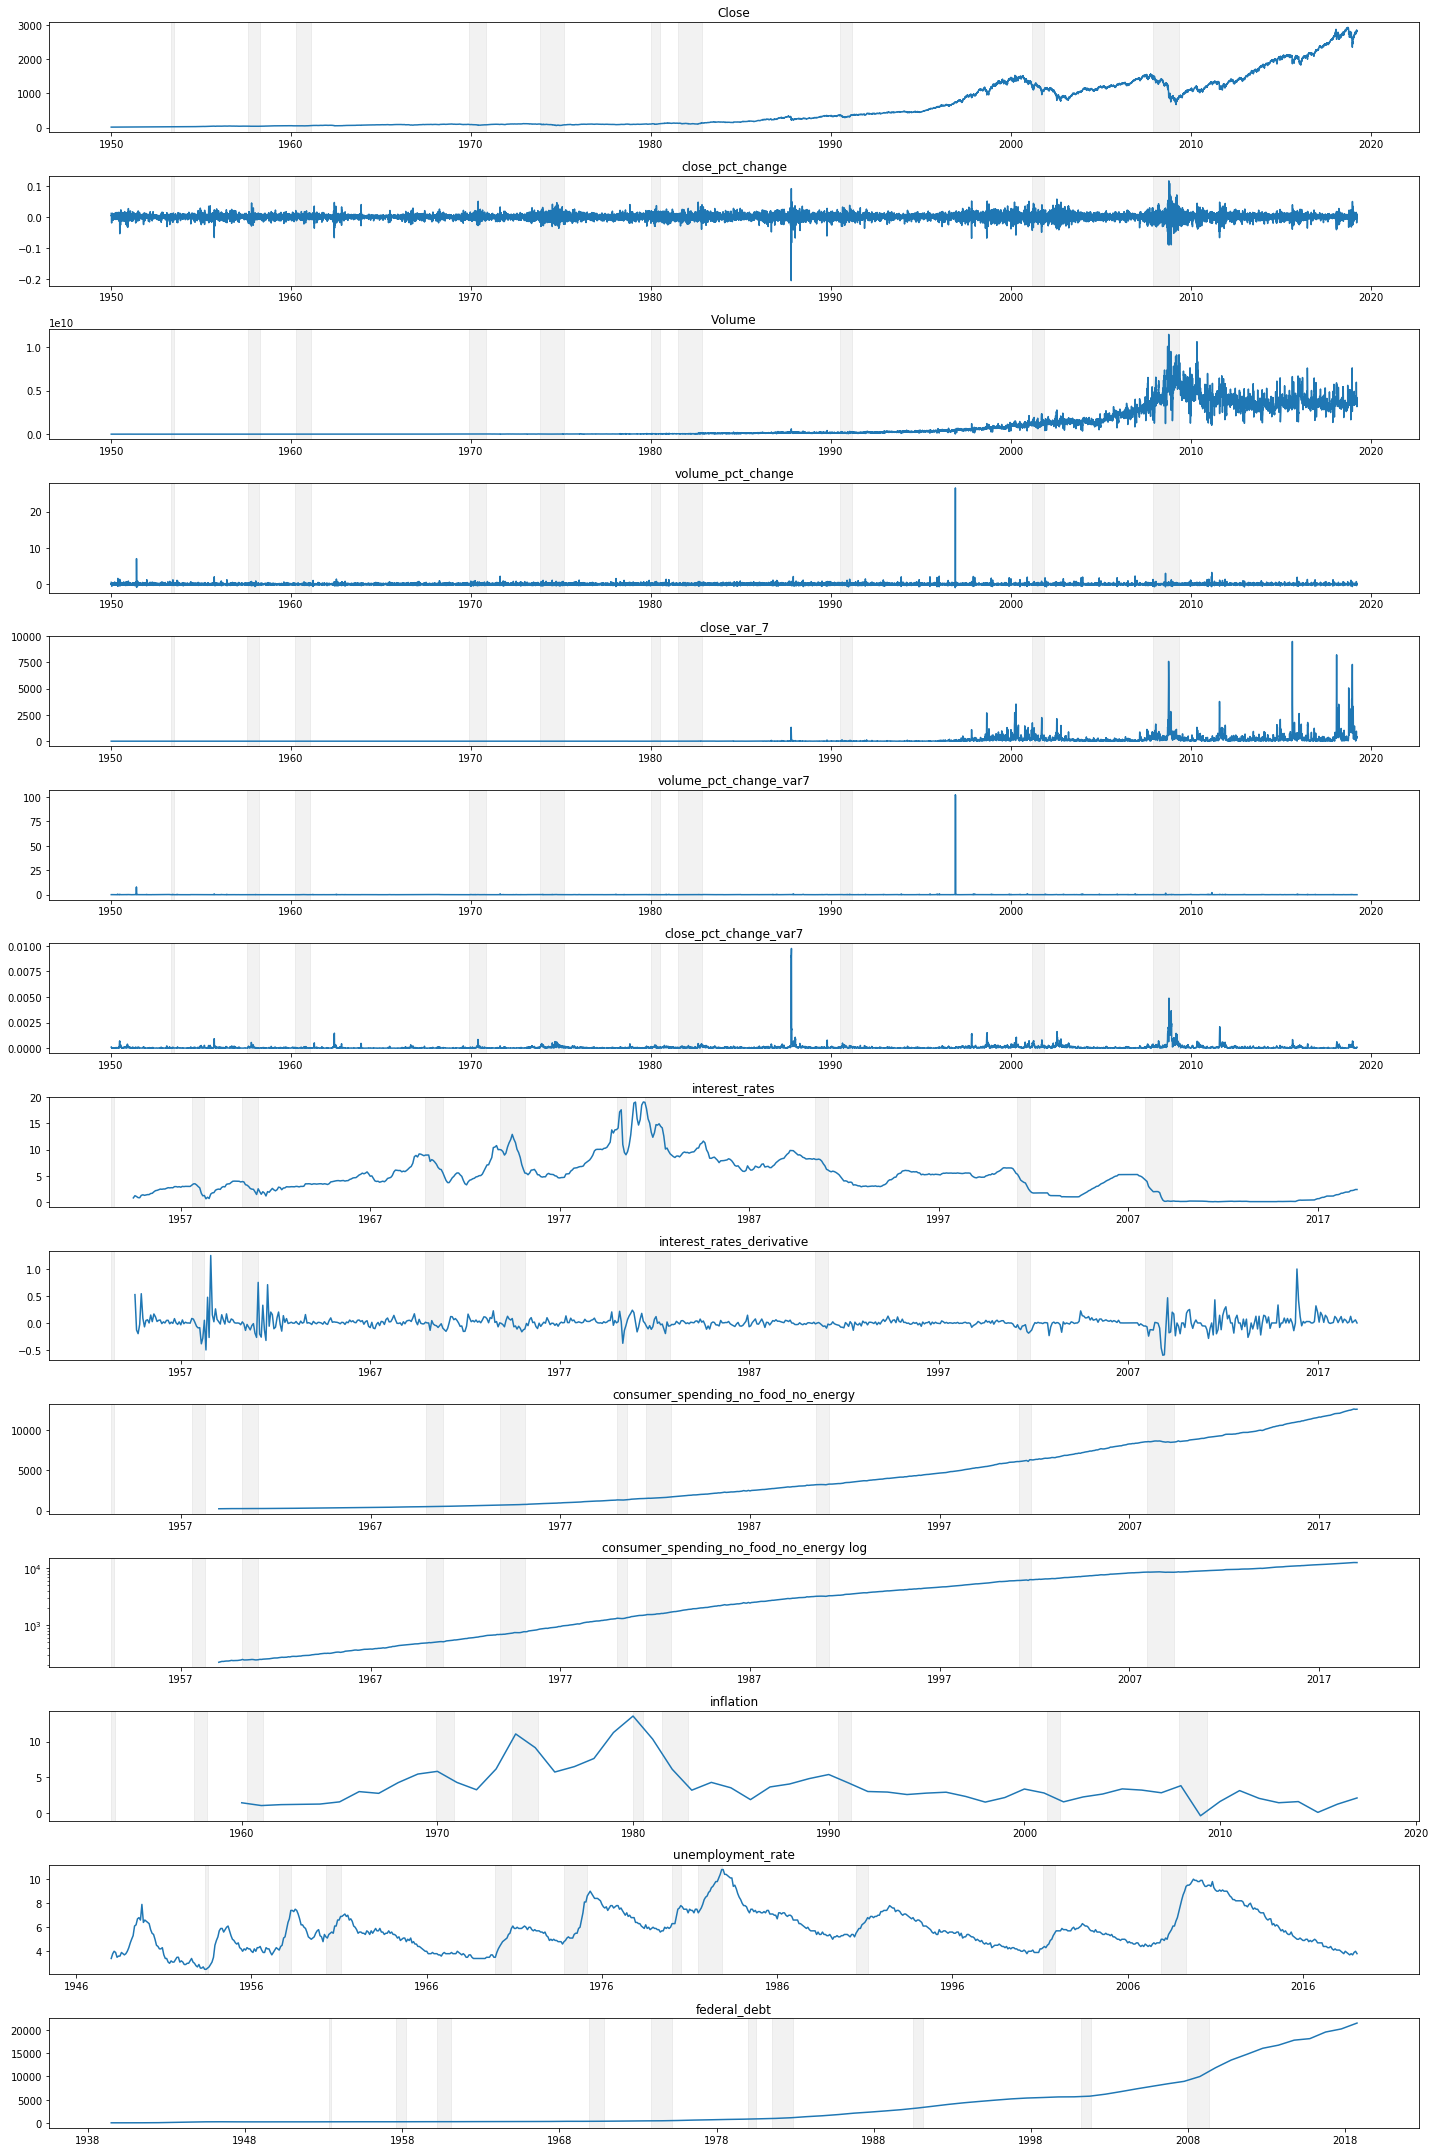

In [139]:
sandp_df = pd.read_csv('data/^GSPC.csv', sep=',')
sandp_df['Date'] = pd.to_datetime(sandp_df['Date'])
sandp_df = sandp_df.set_index('Date')
# sandp_df = sandp_df.loc['2005-1-1':]

# [(start, end)]
# https://www.thebalance.com/the-history-of-recessions-in-the-united-states-3306011
# https://en.wikipedia.org/wiki/List_of_economic_crises
recessions = [
    ('1953-07-01', '1953-05-01'), # Post Korean War 6.1% unemployment
    ('1957-08-01', '1958-04-01'), # 7.5% unemployment
    ('1960-04-01', '1961-02-01'), # Richard Nixon 7.1% unemployment
    ('1969-12-01', '1970-11-01'), # 6.1% unemployment (mild)
    ('1973-11-01', '1975-03-01'), # OPEC - 9% unemployment
    ('1980-01-01', '1980-07-01'), # 
    ('1981-07-01', '1982-11-01'), # 10% unemployment
    ('1990-07-01', '1991-03-01'), # 7.8% unemployment
    ('2001-03-01', '2001-11-01'), # Y2K 6.3% unemployment
    ('2007-12-01', '2009-05-01'), # 2008
]

def plot_recessions(ax):
#     ax.axvline(x=pd.to_datetime(f'20080915', format='%Y%m%d'), linestyle='dashed', color='grey')
    for r in recessions:
        ax.axvspan(
            pd.to_datetime(r[0]),
            pd.to_datetime(r[1]),
            alpha=0.1,
            color='gray')
    pass
        
fig, axes = plt.subplots(14,1,figsize=(20,30))
i=0

axes[i].plot(sandp_df['Close'])
axes[i].set_title('Close')
plot_recessions(axes[i])
i += 1

# axes[i].plot(sandp_df['Close'])
# axes[i].set_yscale('log')
# axes[i].set_title('Close Log')
# plot_recessions(axes[i])
# i += 1

axes[i].plot(sandp_df['Close'].pct_change())
axes[i].set_title('close_pct_change')
plot_recessions(axes[i])
i += 1

axes[i].plot(sandp_df['Volume'])
axes[i].set_title('Volume')
plot_recessions(axes[i])
i += 1

axes[i].plot(sandp_df['Volume'].pct_change())
axes[i].set_title('volume_pct_change')
plot_recessions(axes[i])
i += 1

axes[i].plot(sandp_df['Close'].rolling(window=7).var())
axes[i].set_title('close_var_7')
plot_recessions(axes[i])
i += 1

axes[i].plot(sandp_df['Volume'].pct_change().rolling(window=7).var())
axes[i].set_title('volume_pct_change_var7')
plot_recessions(axes[i])
i += 1

axes[i].plot(sandp_df['Close'].pct_change().rolling(window=7).var())
axes[i].set_title('close_pct_change_var7')
plot_recessions(axes[i])
i += 1

# interest rate
interest_df = pd.read_csv('data/FEDFUNDS.csv', sep=',')
interest_df['DATE'] = pd.to_datetime(interest_df['DATE'])
interest_df = interest_df.set_index('DATE')
interest_rates = interest_df['FEDFUNDS']

axes[i].plot(interest_rates)
axes[i].set_title('interest_rates')
plot_recessions(axes[i])
i += 1

# interest rate derivative
interest_rates_derivative = interest_rates.diff()

axes[i].plot(interest_rates_derivative)
axes[i].set_title('interest_rates_derivative')
plot_recessions(axes[i])
i += 1

# consumer spending
spending_df = pd.read_csv('data/personal_expenditure_no_food_energy.csv')
spending_df['DATE'] = pd.to_datetime(spending_df['DATE'])
spending_df = spending_df.set_index('DATE')
spending = spending_df['DPCCRC1M027SBEA']

axes[i].plot(spending)
axes[i].set_title('consumer_spending_no_food_no_energy')
plot_recessions(axes[i])
i += 1

axes[i].plot(spending)
axes[i].set_yscale('log')
axes[i].set_title('consumer_spending_no_food_no_energy log')
plot_recessions(axes[i])
i += 1

# inflation
df = pd.read_csv('data/inflation.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
inflation = df['FPCPITOTLZGUSA']

axes[i].plot(inflation)
axes[i].set_title('inflation')
plot_recessions(axes[i])
i += 1

# unemployment
df = pd.read_csv('data/unemployment_rate.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
unemployment = df['UNRATE']

axes[i].plot(unemployment)
axes[i].set_title('unemployment_rate')
plot_recessions(axes[i])
i += 1

# US government debt
df = pd.read_csv('data/government_debt.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
federal_debt = df['FYGFD']

axes[i].plot(federal_debt)
axes[i].set_title('federal_debt')
plot_recessions(axes[i])
i += 1

plt.tight_layout()
plt.show()

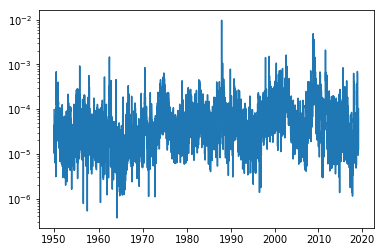

In [132]:
# val_freq_tuples = Counter(
#     sandp_df['Close'].pct_change().rolling(window=7).var()
# ).most_common()

# q_vals = []
# q_freqs = []
# for val, freq in val_freq_tuples:
#     q_vals.append(val)
#     q_freqs.append(freq)

plt.loglog(sandp_df['Close'].pct_change().rolling(window=7).var())

In [77]:

sandp_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [78]:
sandp_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-25,2796.010010,2809.790039,2785.020020,2798.360107,2798.360107,3376580000
2019-03-26,2812.659912,2829.870117,2803.989990,2818.459961,2818.459961,3266050000
2019-03-27,2819.719971,2825.560059,2787.719971,2805.370117,2805.370117,3372930000
2019-03-28,2809.399902,2819.709961,2798.770020,2815.439941,2815.439941,3158170000
2019-03-29,2828.270020,2836.030029,2819.229980,2834.399902,2834.399902,3740700000


In [79]:
sandp_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,17422.000000,17422.000000,17422.000000,17422.000000,17422.000000,1.742200e+04
mean,576.186146,579.587836,572.585569,576.312075,576.312075,9.307335e+08
std,686.997628,690.501119,683.191893,687.094989,687.094989,1.554432e+09
min,16.660000,16.660000,16.660000,16.660000,16.660000,6.800000e+05
25%,86.002500,86.677498,85.292502,86.012501,86.012501,8.970000e+06
50%,166.944999,167.629997,166.070000,166.950005,166.950005,9.487500e+07
75%,1097.794983,1105.507508,1091.059998,1097.832519,1097.832519,1.214275e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,1.145623e+10


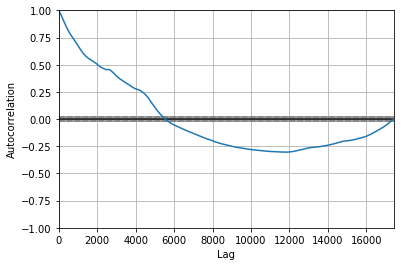

In [134]:
autocorrelation_plot(sandp_df['Close'])
pass

In [155]:
recession_rows = sandp_df.loc['1969-12-01':'1970-11-01']
start_row = recession_rows.head(1)
end_row = recession_rows.tail(1)
(end_row['Close'].values[0] - start_row['Close'].values[0]) / end_row['Close'].values[0]

-0.11975977177177173

In [165]:
plt.hist(sandp_df['Close'].pct_change().dropna().to_list(), bins=1000)
plt.yscale('log')
pass

/Users/nolandey/anaconda/envs/tensorflow3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


(0.8, 200.0)

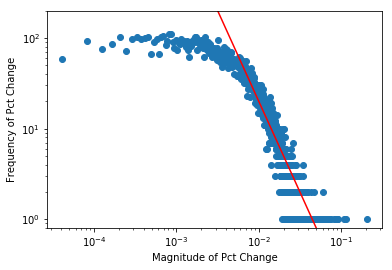

In [220]:
counts, bin_edges = np.histogram(sandp_df['Close'].pct_change().abs().dropna().to_list(), bins=5000)
plt.loglog(bin_edges[:-1], counts, linestyle='None', marker='o')
plt.ylabel('Frequency of Pct Change')
plt.xlabel('Magnitude of Pct Change')
plt.loglog(bin_edges[:-1], 0.002*np.power(bin_edges[:-1],-2), color='red')
plt.ylim(0.8, 2e2)
# plt.scatter(bin_edges[:-1], counts)
# plt.xscale('symlog')
# plt.yscale('symlog')

Text(0.5,0,'Magnitude of Pct Change')

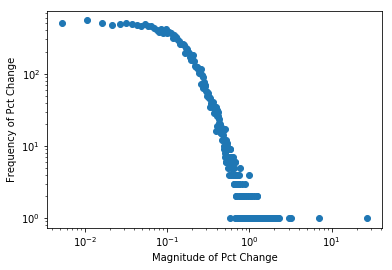

In [224]:
counts, bin_edges = np.histogram(sandp_df['Volume'].pct_change().abs().dropna().to_list(), bins=5000)
plt.loglog(bin_edges[:-1], counts, linestyle='None', marker='o')
plt.ylabel('Frequency of Pct Change')
plt.xlabel('Magnitude of Pct Change')
# plt.loglog(bin_edges[:-1], 0.002*np.power(bin_edges[:-1],-2), color='red')
# plt.ylim(0.8, 2e2)

Text(0.5,0,'Magnitude of Pct Change')

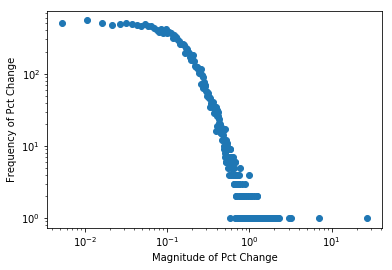

In [225]:
counts, bin_edges = np.histogram(sandp_df['Volume'].pct_change().abs().dropna().to_list(), bins=5000)
plt.loglog(bin_edges[:-1], counts, linestyle='None', marker='o')
plt.ylabel('Frequency of Pct Change')
plt.xlabel('Magnitude of Pct Change')
# plt.loglog(bin_edges[:-1], 0.002*np.power(bin_edges[:-1],-2), color='red')
# plt.ylim(0.8, 2e2)

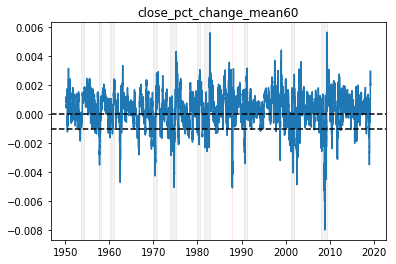

In [227]:
recessions = [
    ('1953-07-01', '1954-05-01'),  # Post Korean War 6.1% unemployment
    ('1957-08-01', '1958-04-01'),  # 7.5% unemployment
    ('1960-04-01', '1961-02-01'),  # Richard Nixon 7.1% unemployment
    ('1969-12-01', '1970-11-01'),  # 6.1% unemployment (mild)
    ('1973-11-01', '1975-03-01'),  # OPEC - 9% unemployment
    ('1980-01-01', '1980-07-01'),  #
    ('1981-07-01', '1982-11-01'),  # 10% unemployment
    ('1990-07-01', '1991-03-01'),  # 7.8% unemployment
    ('2001-03-01', '2001-11-01'),  # Y2K 6.3% unemployment
    ('2007-12-01', '2009-05-01'),  # 2008
]


def plot_recessions():
    # plt.axvline(x=pd.to_datetime(f'20080915', format='%Y%m%d'), linestyle='dashed', color='grey')
    plt.axvspan(
        pd.to_datetime('1987-10-18'),
        pd.to_datetime('1987-10-20'),
        alpha=0.1,
        color='red')
    for r in recessions:
        plt.axvspan(
            pd.to_datetime(r[0]), pd.to_datetime(r[1]), alpha=0.1, color='gray')
        
plt.plot(sandp_df['Close'].pct_change().rolling(window=60).mean())
plt.axhline(0, color='black', linestyle='dashed')
plt.axhline(-0.001, color='black', linestyle='dashed')
plt.title('close_pct_change_mean60')
plot_recessions()

In [232]:
recession_rows = sandp_df['Close'].pct_change().rolling(
    window=60).mean().loc['1969-12-01':'1970-11-01']
start_row = recession_rows.head(1)
end_row = recession_rows.tail(1)

end_row

Date
1970-10-30    0.001315
Name: Close, dtype: float64